In [3]:
import pandas as pd
import re
from langdetect import detect

# 컬럼명 없이 텍스트만 있는 CSV 파일 읽기
df = pd.read_csv('.data/kpop_audience_reviews.csv')
print(f"전체 리뷰: {len(df)}개")

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"영어 리뷰: {len(df)}개")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\n첫 10개 샘플:")
print(df_review.head(10))

전체 리뷰: 845개
영어 리뷰: 798개

첫 10개 샘플:
                                          review_text
0                       this the best 2025 movie ever
1   so fun! artistic, creative, great music and ch...
2              banger music, an actual netflix banger
3                          was amazing love the songs
4   recently saw this on netflix with my girlfrien...
5   pretty good film the animation is brilliant as...
6                          amazing, must watch movie.
7   hate this movie, terrible humor, terribly char...
8              love it !!!!! i love the saja boys !!!
10  we loved the whole experience! singing along w...


In [4]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

,review_text
0,this the best 2025 movie ever
1,so fun artistic creative great music and chara...
2,banger music an actual netflix banger
3,was amazing love the songs
4,recently saw this on netflix with my girlfrien...
5,pretty good film the animation is brilliant as...
6,amazing must watch movie
7,hate this movie terrible humor terribly charac...
8,love it i love the saja boys
10,we loved the whole experience singing along wi...


In [5]:
print(f"총 리뷰 수: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

총 리뷰 수: 798
empty_reviews : 0


In [6]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(10))

여러 공백이 있는 리뷰: 65개
예시:
8                         love it  i love the saja boys 
47                  9  10 i love the song of this movie 
48     let me be clear this definitely was not someth...
54     such an impeccable film  just so so good for a...
65     looking forward for rumi and jinu to get toget...
69     its not my favorite music genre but you can fe...
76     an unexpected gem a review of kpop demon hunte...
91     at first  i thought it was just gonna be an or...
100    kpop demon hunters is pure magic i absolutely ...
109    ive already watched it 4 times and its not the...
Name: review_text, dtype: object


In [7]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(3))

여러 공백이 있는 리뷰: 65개
예시:
8                        love it  i love the saja boys 
47                 9  10 i love the song of this movie 
48    let me be clear this definitely was not someth...
Name: review_text, dtype: object


In [8]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"앞 공백: {leading_spaces.sum()}개")
if leading_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[leading_spaces]['review_text'])

앞 공백: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert
Name: review_text, dtype: object


In [9]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"뒤 공백: {trailing_spaces.sum()}개")
if trailing_spaces.sum() > 0:
    print("\n뒤 공백이 있는 리뷰:")
    print(df_review[trailing_spaces]['review_text'])

뒤 공백: 0개


In [10]:
both_spaces = leading_spaces | trailing_spaces
print(f"앞뒤 공백 총: {both_spaces.sum()}개")
if both_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[both_spaces]['review_text'])

앞뒤 공백 총: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert
Name: review_text, dtype: object


In [11]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [12]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"제거 후: {both_spaces.sum()}개")

제거 후: 0개


In [13]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"단어 1-2개 리뷰: {(min_words < 3).sum()}개")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [14]:
# import os
# from pathlib import Path
# from datetime import datetime

# # 현재 작업 디렉토리 확인
# print(f"현재 작업 디렉토리: {os.getcwd()}")

# # 저장 경로를 명시적으로 지정
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # 데이터프레임 저장
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM 추가로 Excel 호환성 개선
#     print(f"✅ 전처리 완료 및 저장: {output_path}")
#     print(f"📊 저장된 행 수: {len(df_review)}")
# except Exception as e:
#     print(f"❌ 저장 실패: {e}")
#     # 대안: 홈 디렉토리에 저장
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"✅ 대체 경로에 저장: {home_path}")

In [15]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                               tokens  
0                [this, the, best, 2025, movie, ever]  
1   [so, fun, artistic, creative, great, music, an...  
2        [banger, music, an, actual, netflix, banger]  
3                    [was, amazing, love, the, songs]  
4   [recently, saw, this, on, netflix, with, my, g...  
5   [pretty, good, film, the, animat

In [16]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies']
stop_words.update(extra_stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

0                                     [best, 2025, ever]
1      [fun, artistic, creative, great, music, charac...
2                        [banger, music, actual, banger]
3                                 [amazing, love, songs]
4      [recently, saw, girlfriend, even, though, late...
                             ...                        
840    [kpop, demon, hunters, delivers, one, visually...
841    [kpop, demon, hunters, curates, lot, lore, spe...
842    [music, action, comedy, everything, topnotch, ...
843    [need, original, animated, films, like, cast, ...
844    [outsiders, might, bit, bewildered, particular...
Name: filtered_tokens, Length: 798, dtype: object


In [18]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [19]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['best', '2025', 'ever'], ['fun', 'artistic', 'creative', 'great', 'music', 'character'], ['banger', 'music', 'actual', 'banger'], ['amazing', 'love', 'song'], ['recently', 'saw', 'girlfriend', 'even', 'though', 'late', 'hype', 'still', 'think', 'generational', 'probably', 'best', 'thing', 'ive', 'seen', 'long', 'time', 'absolutely', 'second', 'none'], ['pretty', 'good', 'brilliant', 'well', 'story', 'even', 'song', 'catchy', 'put', 'lot', 'western', 'film', 'shame'], ['amazing', 'must', 'watch'], ['hate', 'terrible', 'humor', 'terribly', 'character', 'terrible', 'everything'], ['love', 'love', 'saja', 'boy'], ['loved', 'whole', 'experience', 'singing', 'along', 'theatre', 'fun', 'thing'], ['hree', 'superpowered', 'lass', 'totally', 'powerpuff', 'girl', 'use', 'band', 'cover', 'fighting', 'demon', 'thing', 'go', 'south', 'demon', 'decide', 'fight', 'fire', 'fire', 'seriously', 'leader', 'blossom', 'serious', 'one', 'buttercup', 'silly', 'one', 'bubble', 'thats', 'forgiveable', 'blast'

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS 태깅 결과 (상위 10개):")
print(df[['review_text', 'pos_tags']].head(10))

POS 태깅 결과 (상위 10개):
                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                             pos_tags  
0               [(best, JJS), (2025, CD), (ever, RB)]  
1   [(fun, NN), (artistic, JJ), (creative, JJ), (g...  
2   [(banger, NN), (music, NN), (actual, JJ), (ban...  
3          [(amazing, VBG), (love, NN), (songs, NNS)]  
4   [(recently, RB), (saw, VBD), (girlfriend, VB),...  
5   [(pretty, RB

In [23]:
my_tag_set = ['NN','NNS', 'NNP', 'JJ']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['songs', 'good', 'music', 'great', 'story', 'kpop', 'characters', 'demon', 'watch', 'hunters', 'fun', 'time', 'im', 'plot', 'kids', 'love', 'soundtrack', 'catchy', 'much', 'times']


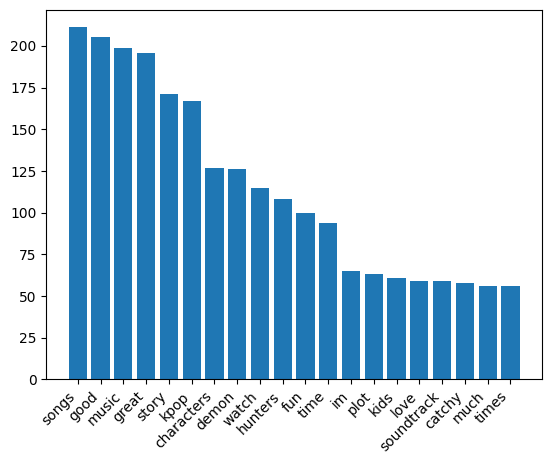

In [24]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

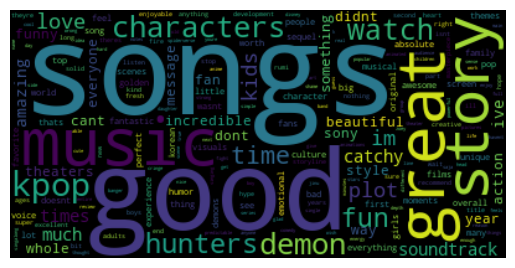

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
movie_rievews = pd.read_csv('.data/kpop_audience_reviews.csv')
fileid = movie_rievews['review_text']
print(fileid.head(10))

0                        This the best 2025 Movie Ever
1    So fun! Artistic, creative, great music and ch...
2               banger music, an actual netflix banger
3                           Was amazing love the songs
4    Recently saw this on Netflix with my girlfrien...
5    Pretty good film the animation is brilliant as...
6                           Amazing, must watch movie.
7    hate this movie, terrible humor, terribly char...
8               Love it !!!!! I love the saja boys !!!
9    DIOS ESTO ES ARTE PURO. EXCELENTE ANIMACION. E...
Name: review_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# CSV 파일 읽기
movie_reviews = pd.read_csv('.data/kpop_audience_reviews.csv')
print(f"총 리뷰 개수: {len(movie_reviews)}")

# CountVectorizer 초기화
vectorizer = CountVectorizer(
    max_features=50,          # 상위 50개 단어만 사용
    stop_words='english',     # 영어 불용어 제거
    lowercase=True,           # 소문자 변환
    ngram_range=(1, 1)        # 단일 단어만 (1-gram)
)

# 벡터화 수행
X = vectorizer.fit_transform(movie_reviews['review_text'])

print(f"\n벡터 크기: {X.shape}")  # (문서 수, 특성 수)
print(f"특성(단어) 개수: {len(vectorizer.get_feature_names_out())}")
print(f"\n상위 20개 특성:")
print(vectorizer.get_feature_names_out()[:20])

In [32]:
documents = [list(movie_rievews.words(fileid)) for fileid in movie_rievews.fileid()]

AttributeError: 'DataFrame' object has no attribute 'fileid'